# Credit Card Fraud

<h3> Context:</h3>


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

<h3>Content:</h3>

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<h3>Inspiration:</h3>

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

<h4> Lets start: </h4>

We will start with Logistic Regression model and further move with other models.Our main aim is to reduce False Negative.

In [8]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import random
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
# for shuffling Dataframe rows
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,140588.0,2.058625,-0.003569,-1.079357,0.384814,-0.006862,-1.069661,0.223129,-0.350140,0.423679,...,-0.278708,-0.623021,0.328465,-0.061874,-0.277045,0.202730,-0.062457,-0.059461,1.98,0
1,153998.0,1.999462,-1.023749,0.103027,-0.332889,-1.373490,-0.147162,-1.201395,0.017144,0.076876,...,-0.292372,-0.268553,0.453270,1.102206,-0.726458,0.403993,0.012351,-0.014807,42.95,0
2,172437.0,-0.305146,0.815341,0.023736,-0.606029,1.154649,-0.903628,0.928527,-0.072873,-0.176077,...,-0.259332,-0.834482,0.034129,0.536199,-0.602073,0.095674,0.094889,0.199247,0.99,0
3,162276.0,-0.090857,0.000897,-1.160707,-2.119016,2.138592,3.702374,-0.256441,0.851035,-1.241710,...,0.218415,0.549163,-0.049212,0.634138,-0.586664,-0.095922,0.128404,0.201140,70.85,0
4,171937.0,1.993292,-1.378354,-0.586733,-1.174188,-0.721908,0.816015,-1.329366,0.199342,0.011075,...,0.274072,0.638791,0.067647,-0.303227,-0.311906,-0.257840,0.018297,-0.029748,105.03,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


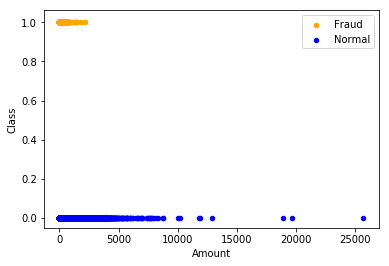

In [4]:
# Scatter plot of both classes
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

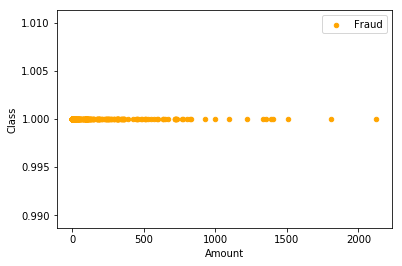

In [5]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

In [6]:
def plot_confusion_matrix(y_test, pred):
    
    y_test_legit = y_test.value_counts()[0]
    y_test_fraud = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))




X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 162 0.0016251517309872295
Number of frauds on y_train: 330 0.0017825889673948273


<h4>Logistic Regression Model:</H4>

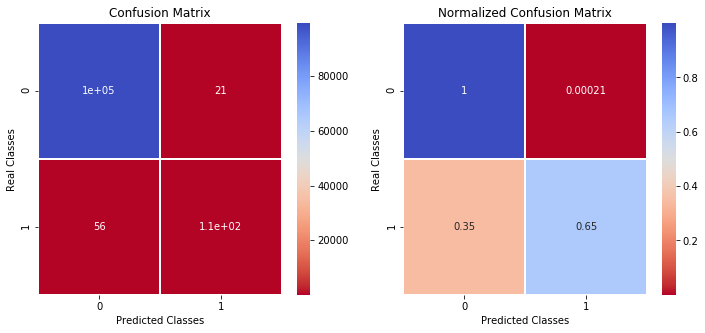

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99521
          1       0.83      0.65      0.73       162

avg / total       1.00      1.00      1.00     99683



In [42]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

AUC-ROC Score: 0.8270549884564347


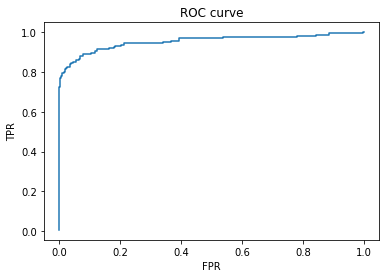

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))


predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

<h4>Logistic Regression with SMOTE over-sampling</h4>

In [13]:
from imblearn.over_sampling import SMOTE 

In [16]:
print(X_train.shape)
print(y_train.shape)

(185124, 30)
(185124,)


In [18]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [39]:
print(X_res.shape)
print(y_res.shape)


unique, counts = np.unique(y_res, return_counts=True)
print(np.asarray((unique, counts)).T)


(369588, 30)
(369588,)
[[     0 184794]
 [     1 184794]]


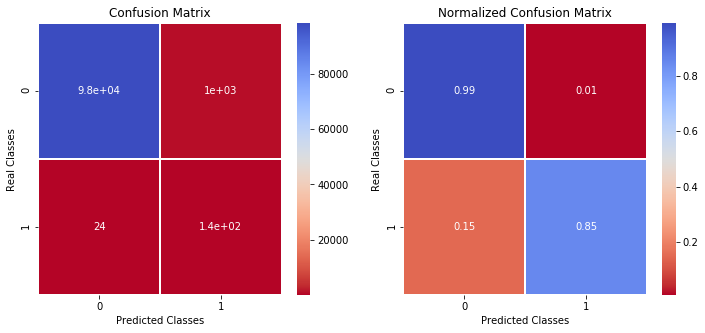

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     99521
          1       0.12      0.85      0.21       162

avg / total       1.00      0.99      0.99     99683

Score:  0.9894967045534344


In [44]:
LogReg = LogisticRegression()
LogReg.fit(X_res, y_res)
y_pred = LogReg.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

print("Score: ", LogReg.score(X_test, y_test))

AUC-ROC Score: 0.9207863071519988


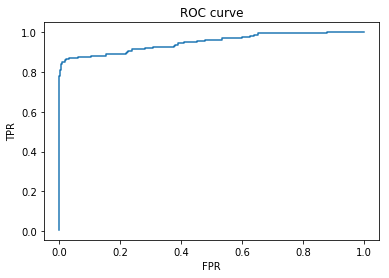

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))


predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

<h4>Decision Tree: </h4>

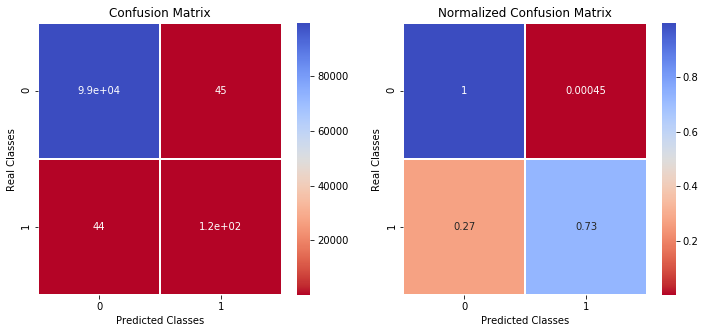

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99521
          1       0.72      0.73      0.73       162

avg / total       1.00      1.00      1.00     99683

AUC-ROC Score: 0.863971447926928


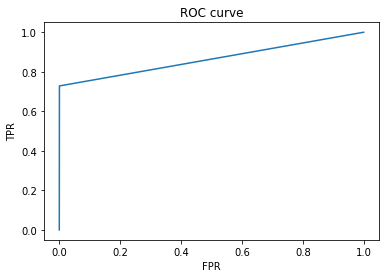

In [46]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
y_pred = model.predict(X_test) 

plot_confusion_matrix(y_test, y_pred)

print("AUC-ROC Score:",roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
# print(classification_report(y_test, y_pred))

<h4>Random Forest:</h4>

Mean Absolute Error: 0.0 degrees.
0.9101975623731502


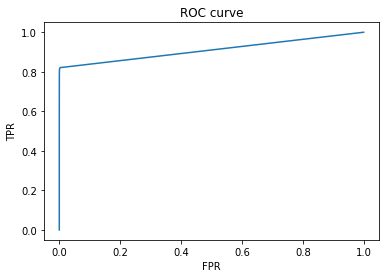

[[99505    16]
 [   39   123]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99521
          1       0.88      0.76      0.82       162

avg / total       1.00      1.00      1.00     99683



In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
confusion_matrix = confusion_matrix(y_test, y_pred.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred.round()))